In [32]:
# Importando as Bibliotecas:

import pandas  as pd
import numpy   as np
import seaborn as sns
import plotly.express    as px
import matplotlib.pyplot as plt

# sns.set() é usado aqui para definir o "tema" estético dos gráficos.
sns.set()

In [33]:
# Lendo os dados:

df = pd.read_csv("imoveis_primary.csv")
original_df = df.copy()

# Usando conceitos de Estatistica, definindo funçoes:
#
## Funcao IRQ = Interqualite Range
## 1. Quartil ==> valor de 25% iniciais dos dados;
## 2. Quartil ==> valor de 50% dos dados
## 3. Quartil ==> valor dos 75% dos dados
## Funcao percentiles ==> calcular a percentagem
## Assim, o pacote Outliers for acima de um gatilho (estamos usando 3.5%), passamos
# para os percentis. Dessa maneira, estamos tirando no máximo 3.5% dos nossos dados


## OBS: usar as informções para detectar Outliers (ponto fora da curva)



<AxesSubplot:xlabel='price_limpo', ylabel='crawler'>

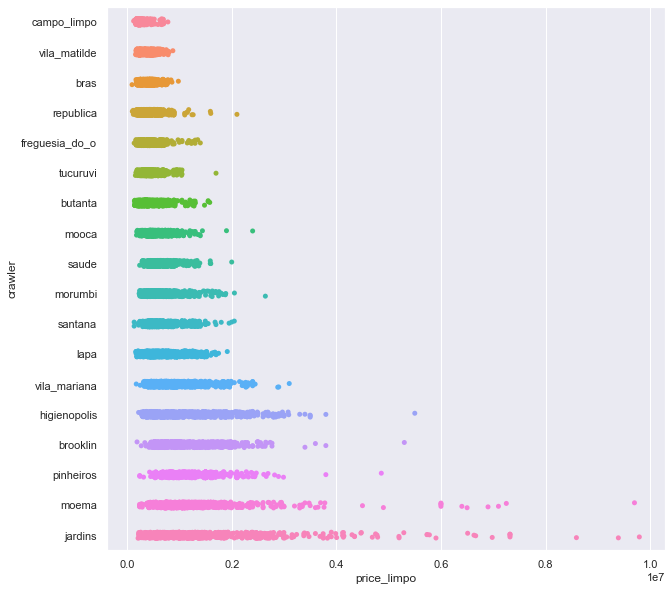

In [34]:
# Strip plot para visualizar os dados
# Estou criando uma variavel chamada order para ordenar o gráfico do menor para o maior

order = df[["crawler", "price_limpo"]].groupby("crawler").mean().sort_values(by="price_limpo").index

plt.figure(figsize=(10,10))
sns.stripplot(data=df, 
              x = "price_limpo", y="crawler", 
              order =order)

In [5]:
# Definindo as FUNçOES:

# Funcao que faz o calculo do IQR e retorna:
# o limite minimo, maximo e a pct de outliers

def iqr(df):    
    q1,q3 = df.quantile([.25,.75])
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    pct_outliers = sum(~df.between(lower_bound, upper_bound))/len(~df.isnull())
    return lower_bound, upper_bound, round(pct_outliers,2)

# Funcao que faz o calculo dos percentis e retorna:
# o limite minimo, maximo e a pct de outliers

def percentiles(df, percentile_level=.01):
    lower_bound, upper_bound = df.quantile([percentile_level, 1-percentile_level])
    pct_outliers = sum(~df.between(lower_bound, upper_bound))/len(df)
    return lower_bound, upper_bound, round(pct_outliers,2)

In [6]:
# For loop para passar por todos os bairros, começar pegando os dados do IQR
# Se a pct de outliers for acima de um gatilho (estamos usando 3.5%), passamos
# para os percentis. Dessa maneira, estamos tirando no máximo 3.5% dos nossos dados

coluna = "price_limpo"
for bairro in df["crawler"].unique():
    metodo = "iqr"
    lower_bound, upper_bound, pct_outliers = iqr(df.loc[df["crawler"]==bairro, coluna])
    if pct_outliers>.035:
        metodo = "percentile"
        lower_bound, upper_bound, pct_outliers = percentiles(df.loc[df["crawler"]==bairro, coluna])
    print(f"Coluna: {coluna}, bairro: {bairro}, metodo: {metodo}, pct_outliers: {pct_outliers}")
    df.loc[(df["crawler"] == bairro) & 
           (~df[coluna].between(lower_bound, upper_bound)), coluna]=np.nan
    

Coluna: price_limpo, bairro: brooklin, metodo: iqr, pct_outliers: 0.01
Coluna: price_limpo, bairro: butanta, metodo: iqr, pct_outliers: 0.03
Coluna: price_limpo, bairro: republica, metodo: iqr, pct_outliers: 0.03
Coluna: price_limpo, bairro: bras, metodo: iqr, pct_outliers: 0.02
Coluna: price_limpo, bairro: freguesia_do_o, metodo: percentile, pct_outliers: 0.02
Coluna: price_limpo, bairro: higienopolis, metodo: iqr, pct_outliers: 0.01
Coluna: price_limpo, bairro: jardins, metodo: percentile, pct_outliers: 0.02
Coluna: price_limpo, bairro: lapa, metodo: percentile, pct_outliers: 0.02
Coluna: price_limpo, bairro: moema, metodo: percentile, pct_outliers: 0.02
Coluna: price_limpo, bairro: mooca, metodo: percentile, pct_outliers: 0.02
Coluna: price_limpo, bairro: morumbi, metodo: percentile, pct_outliers: 0.02
Coluna: price_limpo, bairro: pinheiros, metodo: iqr, pct_outliers: 0.01
Coluna: price_limpo, bairro: santana, metodo: percentile, pct_outliers: 0.02
Coluna: price_limpo, bairro: saude

<AxesSubplot:xlabel='price_limpo', ylabel='crawler'>

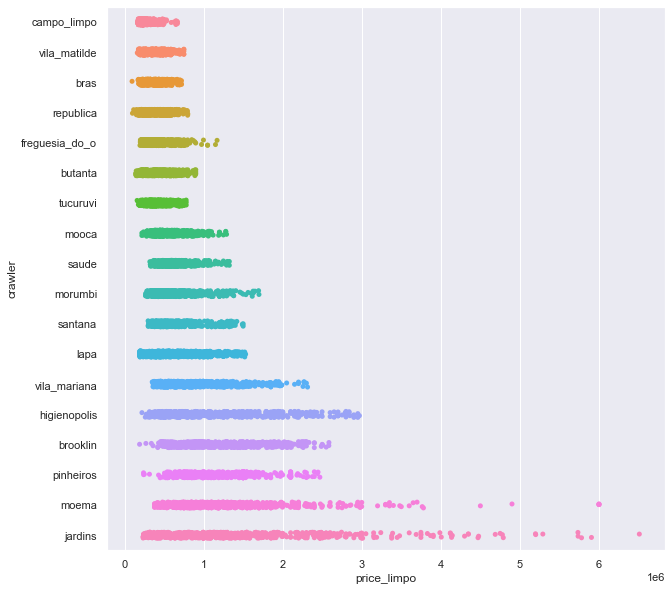

In [ ]:
# Atualizando o stripplot:

order = df[["crawler", "price_limpo"]].groupby("crawler").mean().sort_values(by="price_limpo").index
plt.figure(figsize=(10,10))
sns.stripplot(data=df, 
              x="price_limpo", y="crawler", 
              order=order)

<AxesSubplot:xlabel='price_limpo', ylabel='crawler'>

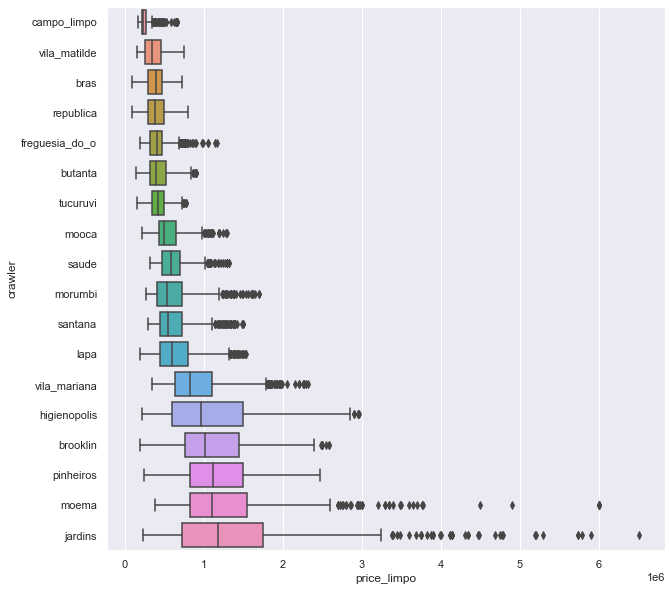

In [7]:
# Atualizando o stripplot:

order = df[["crawler", "price_limpo"]].groupby("crawler").mean().sort_values(by="price_limpo").index
plt.figure(figsize = (10,10))
sns.boxplot(data = df, 
              x="price_limpo", y="crawler", 
              order=order)

In [8]:
def plot_stripplot(df, var_name):
    # Strip plot para visualizar os dados
    # Uma variavel chamada order para ordenar o gráfico
    # do menor para o maior:
    
    order = df[["crawler", var_name]].groupby("crawler").mean().sort_values(by=var_name).index
    plt.figure(figsize = (10,10))
    return sns.stripplot(data=df, 
                         x=var_name, y="crawler", 
                         order=order)

# Analisando os campos e limpeza dos dados

In [ ]:
# Verificando a Area do Apartamento:

<AxesSubplot:xlabel='area_limpo', ylabel='crawler'>

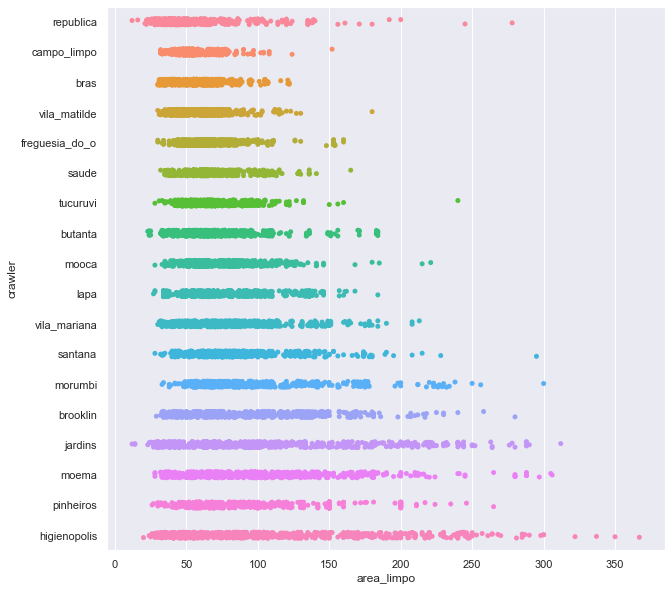

In [9]:
plot_stripplot(df, "area_limpo")

<AxesSubplot:xlabel='rooms_limpo', ylabel='crawler'>

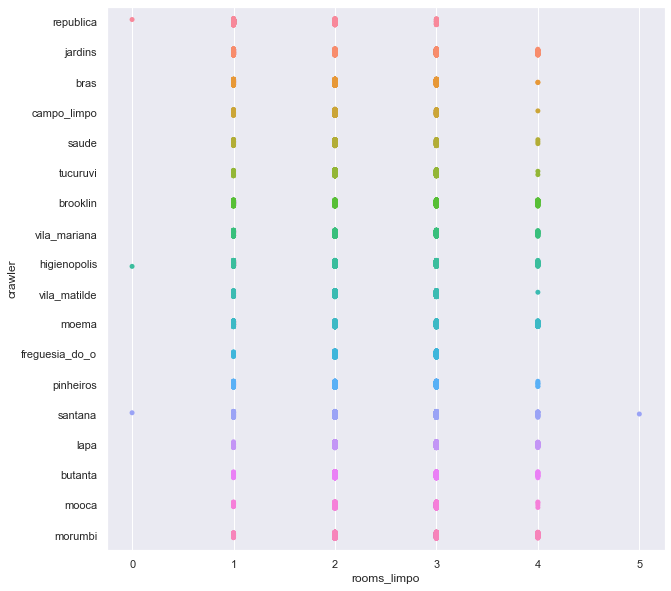

In [10]:
plot_stripplot(df, "rooms_limpo")

In [13]:
# Verifica distribuição de Quartos:

df["rooms_limpo"].value_counts(normalize=True)

2.0    0.523291
3.0    0.312480
1.0    0.146125
4.0    0.018040
5.0    0.000064
Name: rooms_limpo, dtype: float64

In [14]:
# Substitui numero de quartos 0 por nan:

df.loc[df["rooms_limpo"] == 0, "rooms_limpo"] = np.nan

<AxesSubplot:xlabel='bathrooms_limpo', ylabel='crawler'>

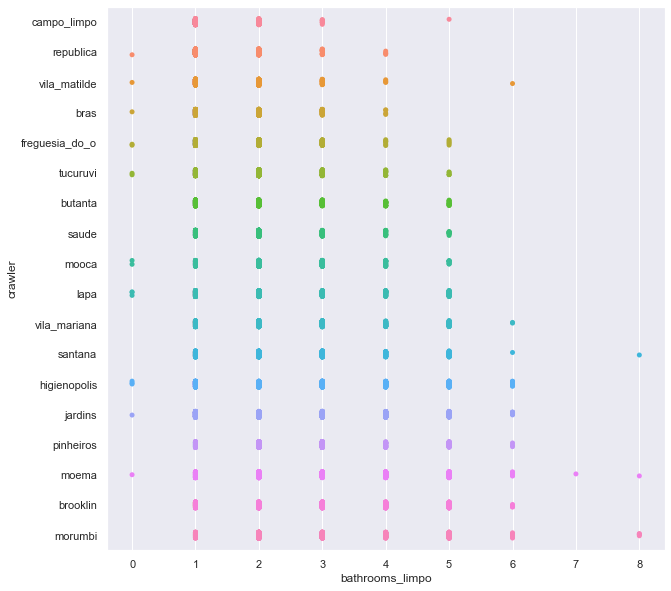

In [15]:
plot_stripplot(df, "bathrooms_limpo")

In [16]:
# Verifica distribuição de Banheiros:

df["bathrooms_limpo"].value_counts(normalize=True)


2    0.448145
1    0.322726
3    0.132955
4    0.052757
5    0.039101
6    0.002770
0    0.001095
8    0.000386
7    0.000064
Name: bathrooms_limpo, dtype: float64

In [ ]:
# Limpeza do número de Banheiros ==> 0, 6,7,8 passam a ser nan:

df.loc[df["bathrooms_limpo"].isin([0,8,7,6]), "bathrooms_limpo"] = np.nan

<AxesSubplot:xlabel='garages_limpo', ylabel='crawler'>

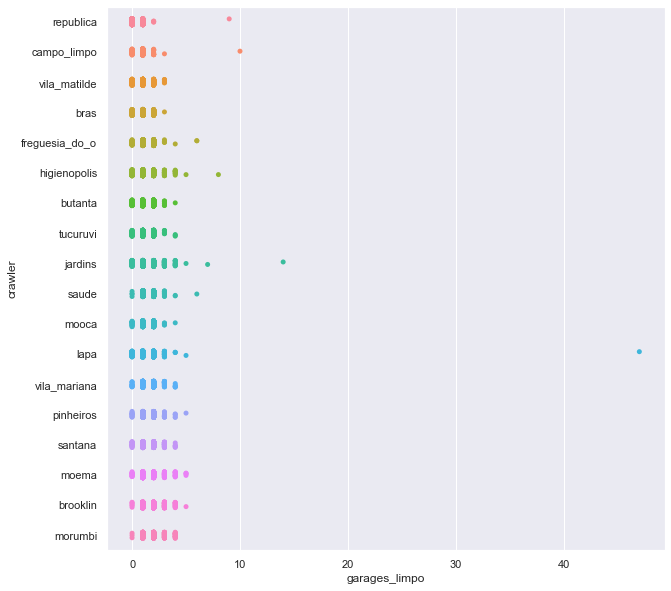

In [17]:
plot_stripplot(df, "garages_limpo")

In [18]:
# Limpeza do numero de Garagens:

df["garages_limpo"].value_counts()

1     8810
2     4809
0     1222
3      560
4      105
5        9
6        3
47       1
7        1
14       1
10       1
9        1
8        1
Name: garages_limpo, dtype: int64

In [19]:
# Garagens Numero >  5 passam para nan:

df.loc[df["garages_limpo"]>=5, "garages_limpo"] = np.nan

In [20]:
# Apenas exemplo para ver um url:

df.loc[df["garages_limpo"] == 4, "url"].iloc[0]

'https://www.vivareal.com.br/imovel/apartamento-3-quartos-brooklin-zona-sul-sao-paulo-com-garagem-240m2-venda-RS3600000-id-2505753682/'

<AxesSubplot:xlabel='condo_limpo', ylabel='crawler'>

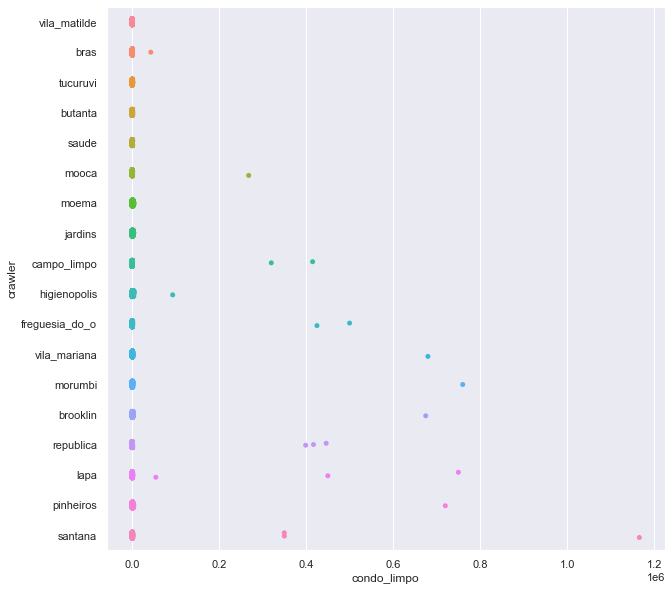

In [21]:
plot_stripplot(df, "condo_limpo")

<AxesSubplot:ylabel='Frequency'>

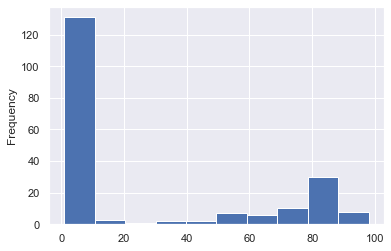

In [23]:
df.loc[df["condo_limpo"] < 100,"condo_limpo"].plot(kind="hist")

In [24]:
# Limpeza do valor do COndominio < R$ 100,00:

# Passa os condominios abaixo de 100 para nan

df.loc[df["condo_limpo"]<=100, "condo_limpo"]=np.nan

In [25]:
# For loop para passar por todos os bairros, começar pegando os dados do IQR
# Se a pct de outliers for acima de um gatilho (estamos usando 3.5%), passamos
# para os percentis. Dessa maneira, estamos tirando no máximo 3.5% dos nossos dados

coluna = "condo_limpo"
for bairro in df["crawler"].unique():
    metodo = "iqr"
    lower_bound, upper_bound, pct_outliers = iqr(df.loc[df["crawler"]==bairro, coluna])
    if pct_outliers>.035:
        metodo = "percentile"
        lower_bound, upper_bound, pct_outliers = percentiles(df.loc[df["crawler"]==bairro, coluna])
    print(f"Coluna: {coluna}, bairro: {bairro}, metodo: {metodo}, pct_outliers: {pct_outliers}")
    df.loc[(df["crawler"]==bairro) & 
           (~df[coluna].between(lower_bound, upper_bound)), coluna]=np.nan
    

Coluna: condo_limpo, bairro: brooklin, metodo: percentile, pct_outliers: 0.21
Coluna: condo_limpo, bairro: butanta, metodo: percentile, pct_outliers: 0.12
Coluna: condo_limpo, bairro: republica, metodo: percentile, pct_outliers: 0.18
Coluna: condo_limpo, bairro: bras, metodo: percentile, pct_outliers: 0.24
Coluna: condo_limpo, bairro: freguesia_do_o, metodo: percentile, pct_outliers: 0.17
Coluna: condo_limpo, bairro: higienopolis, metodo: percentile, pct_outliers: 0.14
Coluna: condo_limpo, bairro: jardins, metodo: percentile, pct_outliers: 0.27
Coluna: condo_limpo, bairro: lapa, metodo: percentile, pct_outliers: 0.26
Coluna: condo_limpo, bairro: moema, metodo: percentile, pct_outliers: 0.2
Coluna: condo_limpo, bairro: mooca, metodo: percentile, pct_outliers: 0.1
Coluna: condo_limpo, bairro: morumbi, metodo: percentile, pct_outliers: 0.2
Coluna: condo_limpo, bairro: pinheiros, metodo: percentile, pct_outliers: 0.57
Coluna: condo_limpo, bairro: santana, metodo: percentile, pct_outliers: 

<AxesSubplot:xlabel='condo_limpo', ylabel='crawler'>

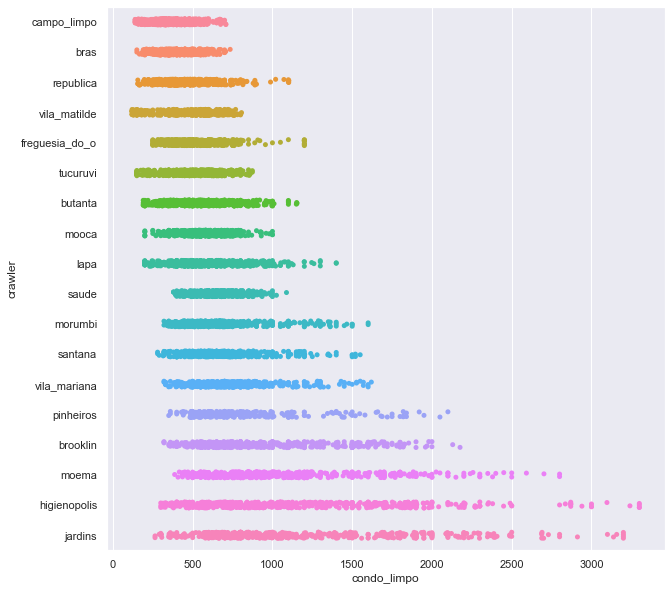

In [26]:
plot_stripplot(df, "condo_limpo")

In [27]:
# Remove os valores NaN (nulos) dos campos:

df = df.dropna(subset=["area_limpo","bathrooms_limpo", "rooms_limpo","condo_limpo", "garages_limpo", "price_limpo"])

In [28]:
df = df.reset_index(drop=True)

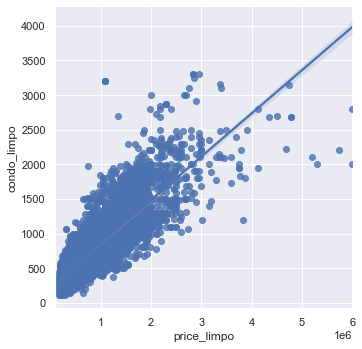

In [29]:
sns.lmplot(data=df, x="price_limpo", y="condo_limpo")

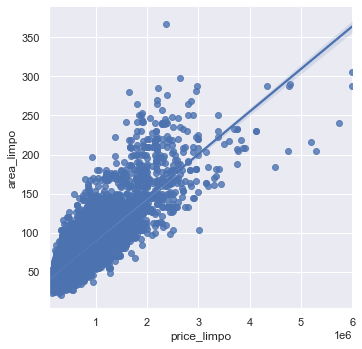

In [ ]:
sns.lmplot(data=df, x="price_limpo", y="area_limpo")

<AxesSubplot:>

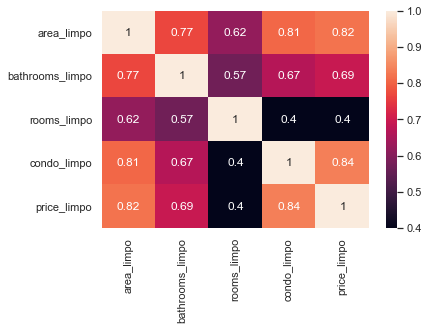

In [30]:
sns.heatmap(df[["area_limpo", "bathrooms_limpo", "rooms_limpo", "condo_limpo", "price_limpo"]].corr(), annot=True)

<AxesSubplot:>

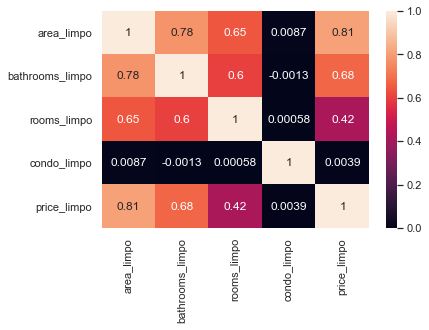

In [ ]:
sns.heatmap(original_df[["area_limpo", "bathrooms_limpo", "rooms_limpo", "condo_limpo", "price_limpo"]].corr(), annot=True)

In [31]:
# Exemplo de plotagem de mapa
# Instalar a biblioteca plotly, 
# instruções aqui: https://plotly.com/python/getting-started/
# Repare nas instrucoes específicas de jupyter notebook e jupyter lab



fig = px.scatter_mapbox(data_frame=df, lat="lat", lon="lon", 
                        hover_name="header", 
                        hover_data=["header", "price_limpo", "crawler"],
                        color="price_limpo", 
                        zoom=10, 
                        height=300,
                        opacity=.5,
                        mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()